In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Import data
df = pd.read_excel('Oxygen_Dissociation_Data.xlsx')
df.columns

Index(['PO2 (mmHg)', 'FracHb'], dtype='object')

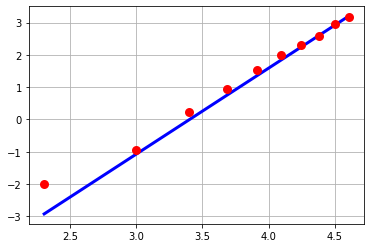

In [35]:
# 7, 8, 9
po2 = np.log(df['PO2 (mmHg)'])
frac_hb = np.log(df['FracHb']/(1 - df['FracHb']))
plt.scatter(po2, frac_hb, color='r', lw=3, zorder=3)

# Linear fit
m, b = np.polyfit(po2[7:], frac_hb[7:], 1)
fitx = [min(po2), max(po2)]
fity = [m*x + b for x in fitx]Load
plt.plot(fitx, fity, color='b', lw=3)
plt.grid()

plt.xlabel('log(PO2)', fontsize=16)
plt.ylabel('log(FracHb / 1 - FracHb)', fontsize=16)
# plt.title('Log of ', fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [36]:
m

2.6577302602622668

In [37]:
def hill(po2, p50):
    n = 2.6577
    return po2**n / (p50**n + po2**n)

In [38]:
po2s = np.linspace(0, 100, 10000)
p50s = [20, 28, 35]

curves = [[hill(i, j) for i in po2s] for j in p50s]

In [40]:
import plotly.express as px
px.line(x=po2s, y=curves)

In [41]:
estimated_p50 = np.e**(-b/m)

30.064965881855883